# Écriture des listes en «compréhension»

**Utiliser la table des matières pour ouvrir/fermer les sections**

Lorsque l'on désigne *explicitement* chaque élément d'un tableau comme dans `t = [4, 3, 2, 1]`, on parle de **notation en extension** du tableau: *chaque valeur est explicitée*.

Python connaît une autre «notation» pour *construire des listes* (ou tableau) appelée **écriture en compréhension**.

En voici quelques exemples; **expérimentez** pour vous familiariser avec cette *syntaxe*.

### Premiers exemples

In [ ]:
[None for _ in range(10)]

L'écriture précédente est équivalente à:

In [ ]:
lst = []
for _ in range(10):
    lst.append(None)
print(lst)

# Note: Dans ce cas particulier,
# on peut aussi utiliser la syntaxe: (décommenter) 
#[None] * 10 

Autre exemple:

In [ ]:
[i for i in range(6)] # même résultat avec list(range(6))

est équivalent à:

In [ ]:
lst = []
for i in range(6):
    lst.append(i)
print(lst)

### Calculer avec la variable de boucle

On peut **utiliser la variable de boucle** pour calculer la «prochaîne valeur» de la liste en cours de production. Par exemple:

In [ ]:
# produire les «suivants» de x pour chaque valeur x dans 0, 1, 4,...
[x + 1 for x in [0, 1, 4, 9, 16, 25]]

In [ ]:
# produire les carrés de x pour x allant de 0 jusqu'à 5.
[x * x for x in range(6)]

On peut combiner les deux exemples précédents en **imbriquant** le second dans le premier

In [ ]:
[y + 1 for y in [x ** 2 for x in range(6)]] # la liste interne est construite en premier

C'est équivalent à:

In [ ]:
lst = []
for x in range(6):
    y = x ** 2
    lst.append(y+1)
print(lst)

ou encore à (en combinant les deux calculs):

In [ ]:
# produire x**2+1 pour x de 0 à 5.
[x**2 + 1 for x in range(6)]

#### Exercice 1

En utilisant l'*écriture en compréhension* des listes, construit:
1. une liste qui contient 10 fois le mot "salut".

2. une liste de longueur 20 qui contient des nombres de la forme $-1$, $-0.9$, $-0.8$ etc.

3. une liste de mots en majuscule à partir d'une liste de mots en minuscule comme `["syntaxe", "des", "listes", "en", "«compréhension»"]`. *Aide*: penser à la méthode `upper` des chaînes.

3. une liste qui contient contient `True` ou `False` à partir de la liste `l=[5, 2, 8, 9, 12]`. `True` signifie que la valeur correspondante de `l` est paire, `False` qu'elle est impaire. *Aide*: penser à l'opérateur modulo `%`.

In [ ]:
#1


In [ ]:
#1
["salut" for _ in range(10)] # ou ["salut"] * 10

In [ ]:
#2


In [ ]:
#2
[-1+i*0.1 for i in range(20)]

In [ ]:
#3


In [ ]:
#3
[mot.upper() for mot in ["syntaxe", "des", "listes", "en", "«compréhension»"]]

In [ ]:
#4


In [ ]:
#4
[n % 2 == 0 for n in [5, 2, 8, 9, 12]]

___

#### Exercice 2

Je voudrais une petite valse à trois temps de 100 mesures `[1,2,3,1,2,3,...]`

*Aide*: utiliser l'opérateur modulo `%` ... au fait, le reste d'une division est toujours strictement inférieure au diviseur ...

In [ ]:
# à toi de jouer
solution = ____

In [ ]:
# pour tester ta solution.
from random import randint
i = 3 * randint(1, 100)
assert len(solution) == 300
assert solution[i:i+3] == [1,2,3]

In [ ]:
solution1 = [(i % 3) + 1 for i in range(3 * 100)]
print(solution1)
solution2 = []

___

### Utiliser une fonction

On peut utiliser une **fonction** utilisant la variable de boucles pour produire les valeurs de la liste:

In [ ]:
def ma_fonc(x):
    return (x, x ** 2)

[ma_fonc(val) for val in range(5)]

In [ ]:
# ou alternativement avec les «micro-fonctions» lambda:
ma_fonc = lambda x: (x, x**2) # x -> (x, x**2)
[ma_fonc(val) for val in range(5)]

Bien sûr, on aurait pu écrire plus directement:

In [ ]:
[(val, val**2) for val in range(5)]

#### Exercice 3 - conversions

Après avoir ouvert un fichier, on suppose avoir obtenue une chaîne comme `"12,5,-9"` qui *représente* une liste de nombres entiers. 

1. Convertir une telle chaîne en une *liste d'entiers*; Pour notre exemple, cela donnerait `[12, 5, -9]`.

In [ ]:
ligne = "12,5,-9"
# à toi de jouer (pense à split afin d'obtenir une liste de chaînes)

In [ ]:
[int(nb) for nb in ligne.split(",")]

2. *Inversement*, on suppose disposer d'une liste d'entiers qu'on souhaiterait enregistrer dans un fichier texte (par opposition à binaire). On décide donc de convertir cette liste en *une chaîne de valeurs séparées par des virgules*...

   Par exemple, `[8, -12, 4]` doit être transformé en `"8,-12,4"`.

In [ ]:
lst = [8, -12, 4]
#1: transforme cette liste d'entiers en une liste de chaînes

#2: Utilise join pour transformer cette liste de chaînes en une liste d'entiers


In [ ]:
lst = [8, -12, 4]
#1: transforme cette liste d'entiers en une liste de chaînes
tmp = [str(x) for x in lst]
#2: Utilise join pour transformer cette liste de chaînes en une liste d'entiers
",".join(tmp)

In [ ]:
lst = [8, -12, 4]
# note: on peut «composer» les deux étapes:
",".join([str(x) for x in lst])

____

### Sélectionner avec `if`

L'objectif est de ne *produire* les valeurs que lorsque la condition qui suit le `if` vaut «vraie». 

In [ ]:
N = 10
# produire i pour i de 0 à N-1 à condition que i ne soit ni 3, ni 7.
[i for i in range(N) if i not in [3, 7]]

*Attention à l'ordre*: la condition doit suivre la boucle. Ceci ne fonctionnera pas:

In [ ]:
[i if i not in [3, 7] for i in range(N)] # la sélection if doit toujours avoir lieu **après** la boucle associée

Encore un exemple:

In [ ]:
a, b = 10, 20
# produire i pour i de a à b-1 à condition que i soit impair 
#     «être impair»: le reste de la division entière par 2 n'est pas nul.
[i for i in range(a, b) if i % 2 != 0]

#### Exercice 4

Construire la liste de tous les entiers entre 50 et 100 (inclus) qui ne sont ni des multiples de 2 ni des multiples de 5: `[51,53,57,...]`

In [ ]:
[i for i in range(50, 101) if not i % 2 == 0 and not i % 5 == 0]

___

### Utiliser plusieurs `for`

Cela ressemble aux *boucles imbriquées*:

In [ ]:
# produire (i,j) pour i de 0 à 2 et, pour chaque i, pour j de 0 à 6.  
[(i,j) for i in range(3) for j in range(6)]

In [ ]:
# produire (i,j) pour j de 0 à 6 et, pour chaque j, pour i de 0 à 2.
[(i,j) for j in range(6) for i in range(3)]

Observez que la seconde boucle est complètement «déroulée» *à chaque itération* de la première. 

On obtient la même chose (que dans le 1er cas ci-dessus) comme cela:

In [ ]:
l = []
for i in range(3):
    for j in range(6):
        l.append( (i,j) )
l

#### Exercice 5

Construire la liste de tous les mots possibles de trois lettres qu'on peut former à partir de 'a', 'b' et 'c'. Combien y en a-t-il?

*Aide*: 
- Lorsqu'on parcourt - `for` - une chaîne, la variable de boucle prend pour valeurs successives chaque caractère de la chaîne (voir l'exemple ci-après),
- Penser à la concaténation des chaînes avec `+`: `"b"+"a"` produit `"ba"`,
- Utiliser plusieurs boucles... (combien?).

In [ ]:
# parcourir une chaîne
for l in "abc":
    print(l)

In [ ]:
# ta solution


In [ ]:
# Cela produit 3*3*3=3**3=27 mots
[l1+l2+l3 for l1 in "abc" for l2 in "abc" for l3 in "abc"]

_____

#### Exercice 6

Pareil que le précédent mais les mots ne doivent pas contenir deux fois la même lettre (*aide*: utiliser un `if`...puis réfléchir «à l'envers»: on **ne veut pas** que la première lettre soit égale à la seconde, ou à la troisième ou la seconde à la troisième)

In [ ]:
# ta solution


In [ ]:
[ l1+l2+l3
     for l1 in "abc" 
     for l2 in "abc" 
     for l3 in "abc" 
     if not (l1 == l2 or l1 == l3 or l2 == l3)
]

___

#### Exercice 7

**Subdiviser** un intervalle $[a, b]$ en $n$ *sous-intervalles de même longueur* consiste à:
1. diviser la longueur de l'intervalle - $b-a$ - par $n$ pour trouver le «`pas`»,
2. puis à utiliser ce `pas` pour trouver la suite:
        a, a + pas, a + 2*pas, a + 3*pas, ..., b

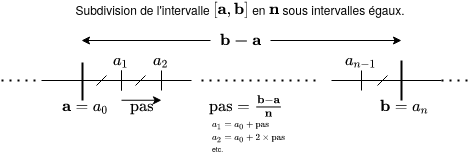

Par exemple, subdiviser l'intervalle $[-3,3]$ en $3$ sous-intervalles:
- pas = $(3-(-3))/3=6/3=2$,
- suite: $-3, -1, 1, 3$.

Écrire une fonction `subdiviser(a, b, n)` dont le corps contient au plus deux lignes et qui renvoie la subdivision de l'intervalle $[a, b]$ en $n$ sous intervalles sous la forme d'une liste. 

In [ ]:
def subdiviser(a, b, n):
    # au plus deux lignes
    pass

In [ ]:
def subdiviser(a, b, n):
    pas = (b-a)/n
    return [a + i*pas for i in range(n+1)]

subdiviser(-3, 3, 3)

### Liste de listes - notion de matrice

Comme déjà vu, on peut **imbriquer** les listes en compréhension à un bout (après le `in` de la première boucle)

In [ ]:
[x + 1 for x in [x**2 for x in range(6)]] # la liste interne est construite en premier

ou à l'autre ... (avant le `for` associé aux crochets de premier niveau)

In [ ]:
[[i for i in range(j, j+4)] for j in [1, 5, 9]]

On produit ainsi une liste de listes. Lorsque les listes internes contiennent des nombres, on parle de **matrice numérique**.

#### Exercice 8

En vous inspirant de l'exemple précédent, produire la «matrice»:

    [[1 , 2,..., 10],
     [11,12,..., 20],
     ...
     [91,92,...,100]]
     
*Aide*: construire la liste «intermédiaire» `[1, 11, 21, ...,91]`

#### Solution

In [ ]:
N = 10
matrice = [[j+i for i in range(N)] for j in [1+i*N for i in range(N)]]
matrice

L'écriture devient quelques peu illisible! Mais python autorise la «ventilation» des éléments sur plusieurs lignes comme suit:

In [ ]:
N = 10
matrice = [
    [j+k for k in range(N)]
    for j in [ 
        1+i*N for i in range(N)
    ] # ou range(1,100,N)
]

## Synthèse

La syntaxe des listes en compréhension *a pour but de produire des* **listes** avec «une syntaxe compacte». Celle-ci admet *plusieurs formes*:

#### Syntaxe «simple»

```python
[ <expr> for <var> in <sequence> ]
```
  
  
`<expr>` désigne une **expression** (*tout ce qui produit une valeur*) qui peut contenir la variable de boucle `<var>`. 
  
À chaque itération de la boucle `for`, l'expression est **évaluée** pour produire la prochaîne valeur de la liste en construction. 

C'est, équivalent à:

```python
l = []
for <var> in <sequence>:
    valeur = <expr>
    l.append(valeur)
```

#### Syntaxe avec `if`

```python
[ <expr> for <var> in <sequence> if <condition> ]
```
  
Similaire, mais l'expression n'est évaluée que si la condition est vraie. Ainsi `if` agit comme une sorte de *filtre*. 

C'est équivalent à:

```python
l = []
for <var> in <sequence>:
    if <condition>:
        valeur = <expr>
        l.append(valeur)
```

#### Syntaxe «multiple»

```python
[ <expr> for <var1> in <sequence1> for <var2> in <sequence2> ...]
```
  
Notez que chaque `for` peut être suivi d'un filtre `if`. La deuxième boucle est entièrement exécutée à chaque itération de la première: elle est «imbriquée» dans la première.

C'est équivalent à:

```python
l = []
for <var1> in <sequence1>:
    # if <cond1>: si un if suit le premier for
    for <var2> in <sequence2>:
        # if <cond2>: si un if suit le deuxime for
        valeur = <expr>
        l.append(valeur)
```

Enfin, puisque cette «syntaxe» produit une valeur, il s'agit d'une **expression**. Il est donc logique de pouvoir l'«imbriquer» là où une expression est attendue... (voir la partie sur la notion de matrice).